In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap


from tabulate import tabulate
from prettytable import PrettyTable
from pyBibX.base import pbx_probe

d:\anaconda\envs\pyBibX\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 导入来自Pubmed中的文献

In [2]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'pubmed-genome-sca-set.txt'
database  = 'pubmed'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 3441 Documents were Found ( 3447 Documents and 6 Duplicates )

Article = 2907
Book Chapter = 1
News = 1
Observational Study = 1
Preprint = 12
Published Erratum = 9
Retracted Publication = 1
Review = 501
Video-Audio Media = 8


# 生成数据分析报告

In [7]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

Main Information    Results
0                                Timespan  2000-2024
1               Total Number of Countries         76
2            Total Number of Institutions      11787
3                 Total Number of Sources        566
4              Total Number of References          0
5               Total Number of Languages          2
6                   --chinese (# of docs)         19
7                   --english (# of docs)       3422
8                                    -//-       -//-
9               Total Number of Documents       3441
10                              --Article       2907
11                         --Book Chapter          1
12                                 --News          1
13                  --Observational Study          1
14                             --Preprint         12
15                    --Published Erratum          9
16                --Retracted Publication          1
17                               --Review        501
18                    --Video-Audio Media          8
19           Average Documents per Author       1.81
20      Average Documents per Institution       2.22
21           Average Documents per Source       6.08
22             Average Documents per Year     137.64
23                                   -//-       -//-
24                Total Number of Authors      11339
25       Total Number of Authors Keywords       4637
26  Total Number of Authors Keywords Plus       7374
27        Total Single-Authored Documents         91
28         Total Multi-Authored Documents       3350
29            Average Collaboration Index       5.92
30                            Max H-Index          0
31                                   -//-       -//-
32              Total Number of Citations          0
33           Average Citations per Author        0.0
34      Average Citations per Institution        0.0
35         Average Citations per Document        0.0
36           Average Citations per Source        0.0
37                                   -//-       -//-

# 元数据可以审查和手动修改。如果需要调整，可以直接编辑 bibfile.data，这是一个包含所有使用信息的 DataFrame。

In [ ]:
#可以修改从txt提取出来的源数据
# The metadata can be reviewed and manually modified. If you need to make adjustments, you can directly edit the bibfile.data, which is a DataFrame containing all the utilized information.
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))
# Modify 'bibfile.data' as needed.

+----+-----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 检查文档检索中的信息，以免后续分析失败,分别检索ID

In [31]:
##输出引用ID的检索
print('引用ID检索:\n',bibfile.table_id_doc.head(15))
# #Check Docs IDs per Type，检查引用文献类型
print('不同类型的文献在数据中是第几篇:\n',bibfile.id_doc_types().head(15))
# Check Authors IDs 检查作者ID
print('作者ID检查:\n',bibfile.table_id_aut.head(15))
# Check Institutions IDs  检查机构 ID
print('机构ID检查:\n',bibfile.table_id_uni.head(15))
# 期刊来源
print('期刊来源ID检查:\n',bibfile.table_id_jou.head(15))
# Check Countries IDs  国家来源检查
print('国家来源ID检查:\n',bibfile.table_id_ctr.head(15))
# Check Authors Keywords IDs 作者关键词
print('话题关键词ID检查:\n',bibfile.table_id_kwa.head(15))
# Check Keywords Plus IDs 补充关键词提示(与此关键词相关的)
print('补充关键词ID检查:\n',bibfile.table_id_kwp.head(15))



引用ID检索:
     ID                                           Document
0    0  Bernstein DB and Sulheim S and Almaas E and Se...
1    1  Machado D and Andrejev S and Tramontano M and ...
2    2  Fouladiha H and Marashi SA and Li S and Li Z a...
3    3  Nouri H and Fouladiha H and Moghimi H and Mara...
4    4  Zorrilla F and Kerkhoven EJ (2022). Reconstruc...
5    5  Qian J and Wang Y and Liu X and Hu Z and Xu N ...
6    6  Tec-Campos D and Posadas C and Tibocha-Bonilla...
7    7  Shen F and Boccuto L and Pauly R and Srikanth ...
8    8  Nilsson A and Nielsen J (2017). Genome scale m...
9    9  van Rosmalen RP and Smith RW and Martins Dos S...
10  10  Marcišauskas S and Ji B and Nielsen J (2019). ...
11  11  Calmels C and McCann A and Malphettes L and An...
12  12  Bordel S and Rojas A and Muñoz R (2019). Recon...
13  13  Li YW and Qian JY and Huang JC and Guo DS and ...
14  14  Singh D and Lercher MJ (2020). Network reducti...
不同类型的文献在数据中是第几篇:
           Document Types                     

# 从文献摘要、标题、作者关键词或关键词加中生成词云

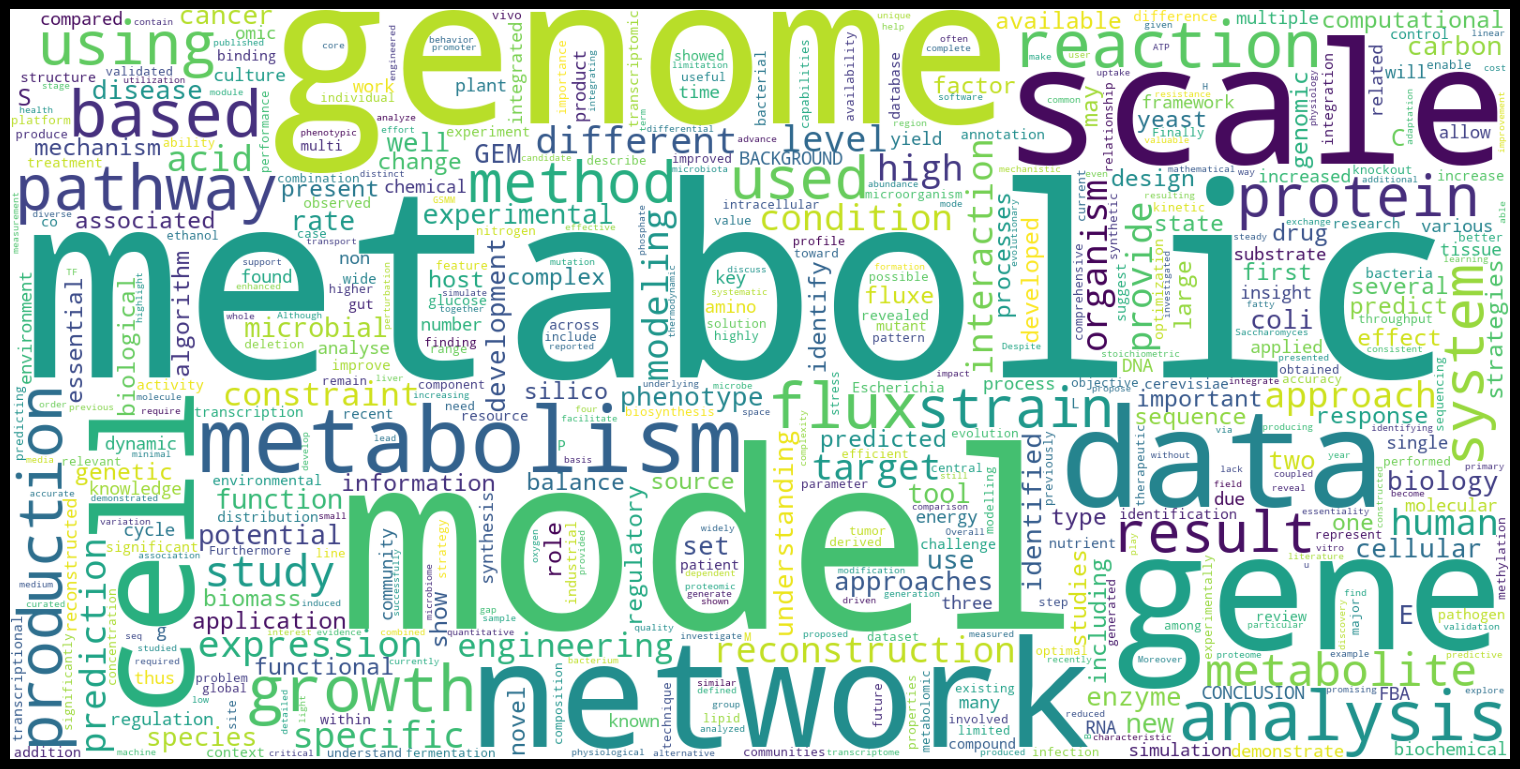

In [33]:
# Arguments: entry = 'abs', 'title', 'kwa', or 'kwp'
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500)

# 分析哪些关键词的重要性 对这些词的理解可以快速了解这个领域的关键信息

In [34]:
# Check Table
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+-----------------+------------+
|       Word      | Importance |
+-----------------+------------+
|    metabolic    |    1.0     |
|      model      |   0.8665   |
|      genome     |   0.5929   |
|      scale      |   0.4966   |
|       gene      |   0.4681   |
|     network     |   0.3806   |
|       cell      |   0.3343   |
|       data      |   0.3259   |
|    metabolism   |   0.2991   |
|     analysis    |   0.2895   |
|     reaction    |   0.252    |
|      based      |   0.2489   |
|      growth     |   0.2437   |
|     pathway     |   0.2349   |
|       flux      |   0.2334   |
|    production   |   0.2172   |
|      using      |   0.2129   |
|       used      |   0.2022   |
|      method     |   0.1937   |
|     protein     |   0.1921   |
|      system     |   0.1885   |
|      result     |   0.1875   |
|      strain     |   0.1786   |
|    metabolite   |   0.173    |
|      study      |   0.1623   |
|    expression   |   0.1477   |
|    different    |   0.1468   |
|      tar

# 识别和统计文本中连续出现的词汇组合的频率

In [3]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [ ]:
# Check Table
bibfile.ask_gpt_ng.head(15)#检查上一步生成是否有问题
# data_table.DataTable(data_ng, num_rows_per_page = 15)

Word  Freq
0              metabolic networks and  1028
1               networks and pathways  1028
2          gene expression regulation   433
3               and pathways genetics   404
4       computational biology methods   276
5                 and pathways models   273
6        proteins genetics metabolism   266
7           escherichia coli genetics   264
8       growth development metabolism   253
9           gene expression profiling   251
10         pathways models biological   247
11        genetics growth development   232
12            systems biology methods   201
13  saccharomyces cerevisiae genetics   181
14         genetics models biological   178

# 生成一个交互式图表，显示文档的投影（每个文档的坐标）和标签（每个文档的聚类）

In [ ]:
# 参数：

# view：指定图表的显示方式，可以在笔记本应用或浏览器窗口中查看。
# corpus_type：指定分析的文本数据类型，可以是摘要、标题、作者关键词或关键词加。
# stop_words：提供停用词列表，用于清洗语料库，移除常见但无关紧要的词汇。
# rmv_custom_words：提供自定义停用词列表，用于进一步清洗语料库。
# custom_label：提供自定义标签列表，用于定义每个文档的聚类。
# custom_projection：提供自定义坐标列表，用于定义每个文档的坐标。
# n_components：指定维度的数量，即投影分析的降维后的维度。
# n_clusters：指定聚类的数量。
# tf_idf：布尔值，指示是否使用TF-IDF（词频-逆文档频率）加权的文档-术语矩阵来计算每个文档的标签。
# embeddings：布尔值，指示是否使用词嵌入来计算每个文档的标签。
# method：指定投影方法，可以是截断奇异值分解（TSVD）或统一流形近似和投影（UMAP）。
# 功能
# 该函数通过指定的文本数据类型和分析方法，对文档集合进行降维和聚类分析。
# 它使用指定的投影方法（如TSVD或UMAP）将高维文本数据映射到低维空间，以便可视化。
# 根据是否使用TF-IDF或词嵌入，函数可以计算文档的标签，这些标签表示文档的聚类归属。
# 最终，函数返回每个文档的坐标和聚类标签，并生成一个交互式图表，用户可以在其中探索文档之间的关系。

In [5]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             method            = 'umap')

# 检查上一个结果的表格

In [6]:
# Check Table
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
data_pr.head(15)
# data_table.DataTable(data_pr, num_rows_per_page = 15)

0          1    2
0   1.565019   7.750614  0.0
1  -1.076737  11.063828  3.0
2   4.610117   9.458487  2.0
3   3.238763  10.590419  2.0
4  -0.561759   8.732530  3.0
5   2.190791  10.181904  2.0
6   0.533404  11.448346  3.0
7  -0.176676   4.733067  4.0
8  -2.145411   6.548590  1.0
9   2.146370   7.843733  0.0
10  1.071543   9.803491  2.0
11  4.594949   9.445479  2.0
12  2.847789  12.272346  2.0
13  0.377929  10.736006  3.0
14  1.399279   8.161424  0.0

In [7]:
# Check Articles per Cluster
cluster      = 2
idx_articles = [i for i in range(0, labels.shape[0]) if labels[i] == cluster]
print(*idx_articles, sep = ', ')

2, 3, 5, 10, 11, 12, 16, 17, 19, 20, 22, 26, 28, 30, 39, 40, 41, 44, 46, 47, 48, 52, 53, 54, 55, 56, 62, 63, 65, 67, 75, 76, 82, 83, 84, 90, 93, 96, 105, 106, 108, 111, 116, 123, 128, 131, 133, 138, 149, 150, 151, 153, 162, 169, 172, 175, 182, 183, 185, 191, 195, 196, 197, 202, 204, 205, 213, 215, 227, 228, 230, 231, 237, 240, 241, 242, 243, 249, 250, 251, 257, 259, 261, 278, 288, 297, 323, 324, 326, 331, 340, 342, 345, 346, 350, 359, 363, 368, 378, 385, 388, 395, 397, 402, 403, 413, 419, 420, 425, 428, 433, 438, 446, 448, 462, 465, 481, 486, 505, 506, 507, 510, 511, 513, 515, 518, 520, 523, 524, 525, 527, 528, 529, 531, 535, 536, 543, 544, 545, 546, 548, 549, 551, 552, 557, 559, 564, 565, 566, 568, 570, 571, 575, 581, 585, 595, 601, 603, 604, 608, 610, 616, 618, 622, 625, 630, 633, 634, 638, 643, 649, 651, 653, 654, 656, 664, 669, 671, 678, 679, 682, 686, 687, 688, 693, 694, 697, 700, 709, 711, 722, 723, 725, 726, 727, 730, 731, 734, 736, 739, 740, 741, 744, 748, 751, 752, 760, 761, 7

# 绘制特定关键词随时间变化的趋势图

In [10]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
# 参数：

# view：指定图表的显示方式，可以在笔记本应用或浏览器窗口中查看。
# key：指定分析的文本数据类型，可以是摘要、标题、期刊、作者关键词或关键词加。
# stop_words：提供停用词列表，用于清洗语料库，移除常见但无关紧要的词汇。这里指定了英语（'en'）作为停用词语言。
# rmv_custom_words：提供自定义停用词列表，用于进一步清洗语料库。
# topn：指定要展示的实体数量，这里是10个。
# txt_font_size：指定图表中文本的字体大小。
# start：指定开始年份，-1表示从最早的年份开始。
# end：指定结束年份，-1表示到最晚的年份结束。
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'kwp',
                            topn             = 10,
                            txt_font_size    = 12,
                            start            = 2000,
                            end              = 2024)

In [ ]:
# View Table(查看趋势)
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 15))

 2000:
biological (1),
humans (1),
models (1),
animals (1),
bacterial (1),
*genome (1),
transcription
(1), phylogeny
(1), binding
sites (1), base
sequence (1)
2001: *models
(2), genetic
(2), models
(1), biological
(1), genome
(1), animals
(1), gene
expression
regulation (1),
phenotype (1),
molecular (1), 
carbon/metaboli
sm (1) 2002:
bacterial (6),
models (5),
biological (4),
genome (4),
animals (3),
*genome (3),
*models (2),
genetic (2),
phenotype (2),
rna (2) 2003:
biological
(13), *models
(11), models
(9), genome
(8), gene
expression
regulation (8),
animals (7),
*genome (6),
bacterial (6),
humans (5),
genetic (5)
2004:
biological
(14), *models
(12), models
(12), *genome
(10), bacterial
(8), genetic
(7), animals
(6), gene
expression
regulation (6),
fungal (6),
protein binding
(6) 2005:
models (19),
genetic (18),
biological
(17), genome
(15), *models
(15), computer
simulation
(12), *genome
(10), bacterial
(10), gene
expression
regulation (9),
humans (9)
2006:
biological
(24), *models


view：指定图表的显示方式，可以在笔记本应用或浏览器窗口中查看。
entry：一个列表，包含以下键之一或多个：
'aut'：作者
'cout'：被引次数
'inst'：机构
'jou'：期刊
'kwa'：作者关键词
'kwp'：关键词加
'lan'：语言

该函数根据提供的实体类型和数量，计算每个实体的流量或转移量。
它使用这些数据生成一个桑基图，图中的每个实体都是一个节点，节点之间的连接表示流量或转移，连接的宽度与流量的大小成正比。
用户可以通过拖动白色条形来交互，这可能意味着用户可以调整图中的某些部分以改变视图或过滤数据。

In [3]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

# PS: The white bars can be dragged

In [5]:
# View Table查看桑葚图中的数据
data_sk = bibfile.ask_gpt_sk.head(15)
data_sk

Node From                               Node To  \
0                  nielsen j                                Sweden   
1                 palsson bo              United States of America   
2                 palsson bø              United States of America   
3                   papin ja              United States of America   
4                 maranas cd              United States of America   
5                      liu l                                 China   
6               mardinoglu a                                Sweden   
7                     lee sy                      UNKNOW_Countries   
8                 palsson bo                               Denmark   
9                   price nd              United States of America   
10  United States of America              university of california   
11          UNKNOW_Countries                   UNKNOW_Institutions   
12  United States of America  department of biomedical engineering   
13                    Sweden     chalmers university of technology   
14  United States of America    university of california san diego   

    Connection Weigth  
0                  87  
1                  78  
2                  52  
3                  51  
4                  47  
5                  41  
6                  41  
7                  37  
8                  36  
9                  36  
10                102  
11                 52  
12                 46  
13                 37  
14                 37

函数描述：这个函数生成一个树图，展示特定实体（如期刊、作者、关键词等）的分布情况。

参数：

entry：指定要展示的数据类型，可以是以下值之一：
'kwp'：关键词加
'kwa'：作者关键词
'aut'：作者
'jou'：期刊
'ctr'：国家或地区
'inst'：机构
topn：指定要展示的实体数量，这里是20个。
size_x 和 size_y：这两个参数用于指定生成的树图图像的尺寸，单位通常是英寸。
txt_font_size：指定树图中文本的字体大小。

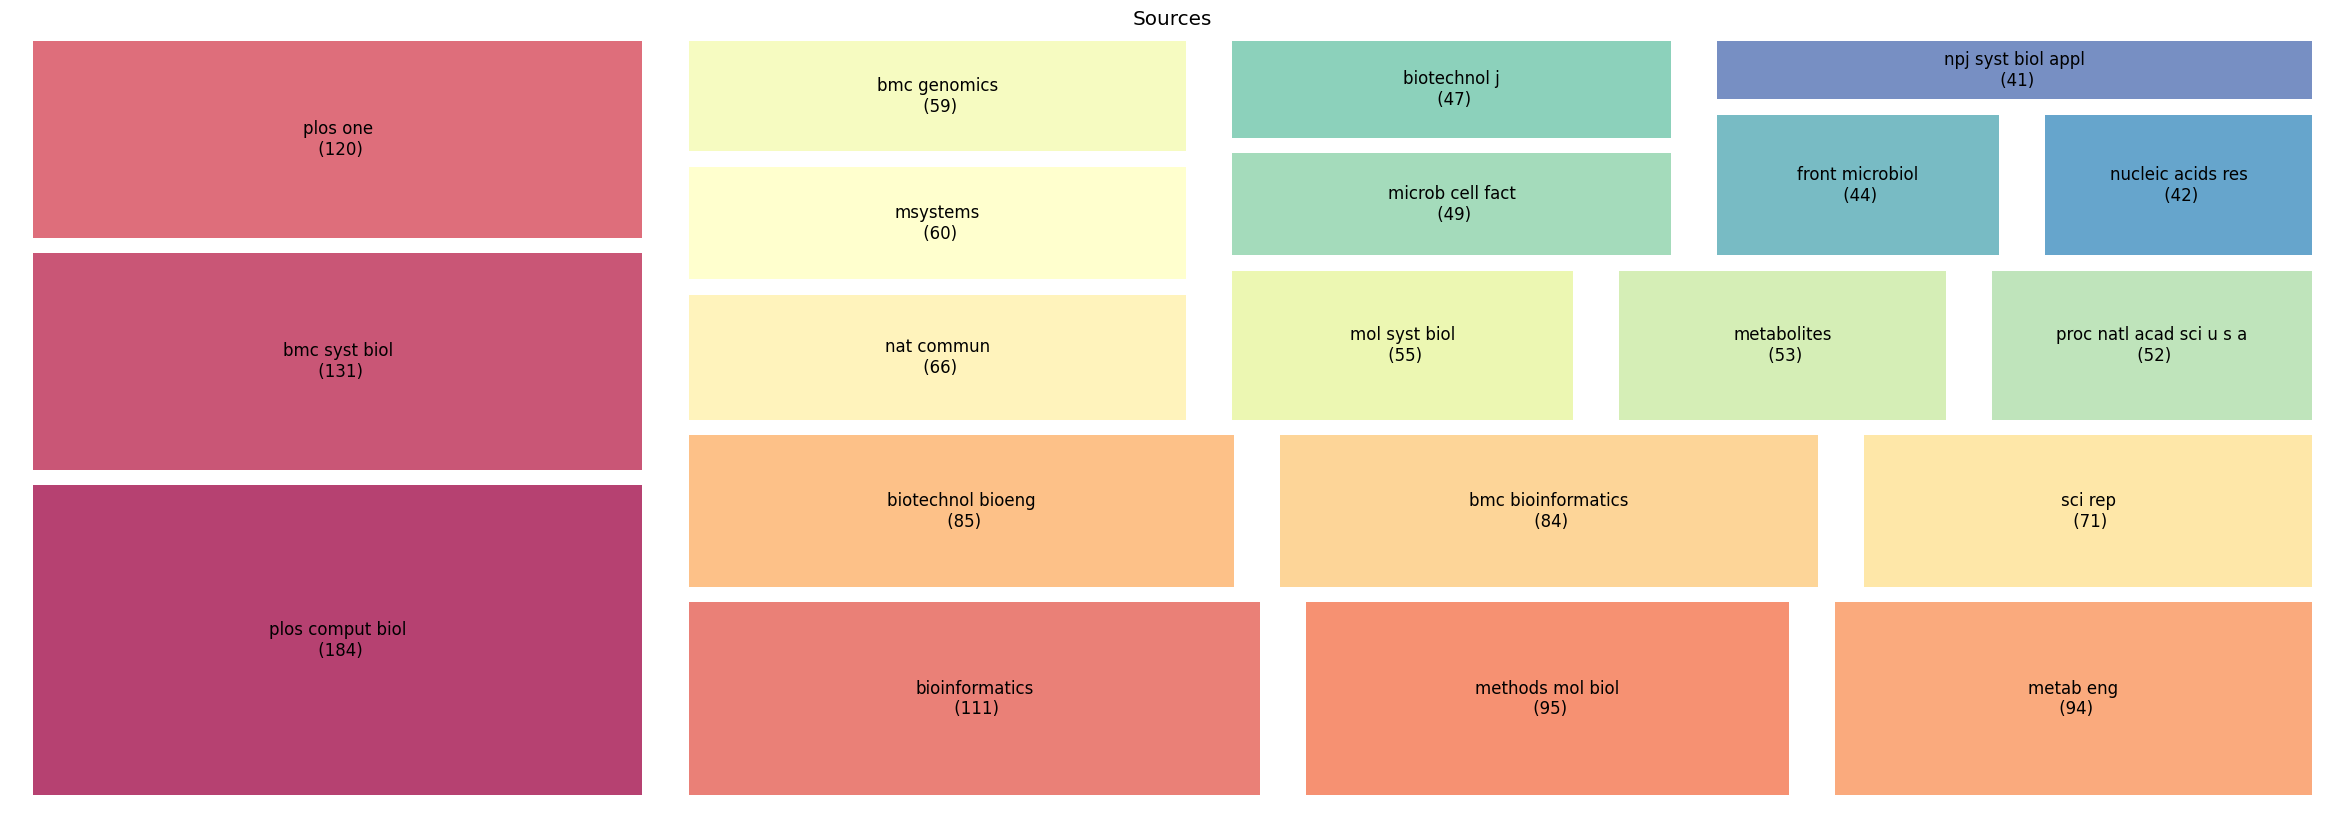

In [6]:
# Tree Map
# Arguments: entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10, txt_font_size = 12)

In [8]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [9]:
# View Table
data_ap = bibfile.ask_gpt_ap.head(15)
data_ap


2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
nielsen j      0.0   0.0   0.0   2.0   2.0   4.0   4.0   1.0   6.0   4.0  ...   
palsson bo     1.0   1.0   2.0   8.0   4.0   3.0   2.0   3.0   1.0   2.0  ...   
palsson bø     0.0   0.0   2.0   4.0   7.0   2.0   7.0   5.0   6.0   5.0  ...   
mardinoglu a   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
papin ja       0.0   0.0   2.0   3.0   1.0   0.0   0.0   0.0   3.0   3.0  ...   
maranas cd     0.0   0.0   0.0   1.0   1.0   2.0   0.0   1.0   0.0   4.0  ...   
lee sy         0.0   0.0   0.0   0.0   1.0   0.0   0.0   2.0   3.0   5.0  ...   
liu l          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
lee dy         0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   5.0  ...   
zhang c        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
thiele i       0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   2.0  ...   
lewis ne       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
ruppin e       0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0  ...   
rocha i        0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...   
price nd       0.0   0.0   2.0   3.0   2.0   1.0   3.0   0.0   0.0   0.0  ...   

              2015  2016  2017  2018  2019  2020  2021  2022  2023  2024  
nielsen j     13.0  11.0  10.0   7.0   8.0  14.0  11.0   7.0   4.0   7.0  
palsson bo     6.0  14.0   6.0  14.0  13.0  21.0   5.0   3.0   3.0   4.0  
palsson bø     0.0   1.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   1.0  
mardinoglu a   9.0   5.0   4.0   5.0   3.0   9.0   9.0   2.0   2.0   4.0  
papin ja       2.0   0.0   3.0   0.0   6.0   6.0   4.0   4.0   5.0   3.0  
maranas cd     3.0   4.0   5.0   3.0   3.0   3.0   3.0   2.0   3.0   1.0  
lee sy         2.0   2.0   3.0   0.0   4.0   3.0   0.0   0.0   1.0   1.0  
liu l          6.0   2.0   2.0   2.0   3.0   0.0   1.0   3.0   4.0   4.0  
lee dy         2.0   6.0   2.0   3.0   1.0   8.0   0.0   3.0   2.0   1.0  
zhang c        4.0   4.0   5.0   3.0   3.0   4.0   9.0   3.0   2.0   5.0  
thiele i       2.0   3.0   3.0   3.0   3.0   2.0   2.0   0.0   4.0   2.0  
lewis ne       2.0   3.0   1.0   2.0   2.0   6.0   5.0   0.0   3.0   4.0  
ruppin e       4.0   4.0   3.0   1.0   2.0   0.0   3.0   0.0   0.0   0.0  
rocha i        2.0   4.0   4.0   4.0   5.0   5.0   2.0   2.0   2.0   0.0  
price nd       5.0   1.0   0.0   1.0   2.0   4.0   1.0   0.0   1.0   1.0  

[15 rows x 25 columns]

函数描述：

这个函数生成一个条形图，展示特定统计数据的分布情况。
参数：

statistic：指定要展示的统计数据类型，可以是以下值之一：
'dpy'：每年文档数量
'cpy'：每年引用次数
'ppy'：过去每年引用次数
'ltk'：洛特卡定律
'spd'：每篇文档的来源数量
'spc'：每个引用的来源数量
'apd'：每篇文档的作者数量
'apc'：每个引用的作者数量
'aph'：每个H指数的作者数量
'bdf_1', 'bdf_2', 'bdf_3'：布拉德福定律核心来源1、2或3
'ipd'：每篇文档的机构数量
'ipc'：每个引用的机构数量
'cpd'：每篇文档的国家数量
'cpc'：每个引用的国家数量
'lpd'：每篇文档的语言数量
'kpd'：每篇文档的关键词加数量
'kad'：每篇文档的作者关键词数量
topn：指定要展示的实体数量，这里是20个。
size_x 和 size_y：这两个参数用于指定生成的条形图图像的尺寸，单位通常是英寸。
功能：

该函数根据提供的统计数据类型和数量，计算每个类别的数值。
它使用这些数据生成一个条形图，图中的每个类别都是一个条形，条形的长度与类别的数值成正比。
条形图可以直观地展示不同类别之间的数值比较，帮助用户快速识别最大的类别或数值。

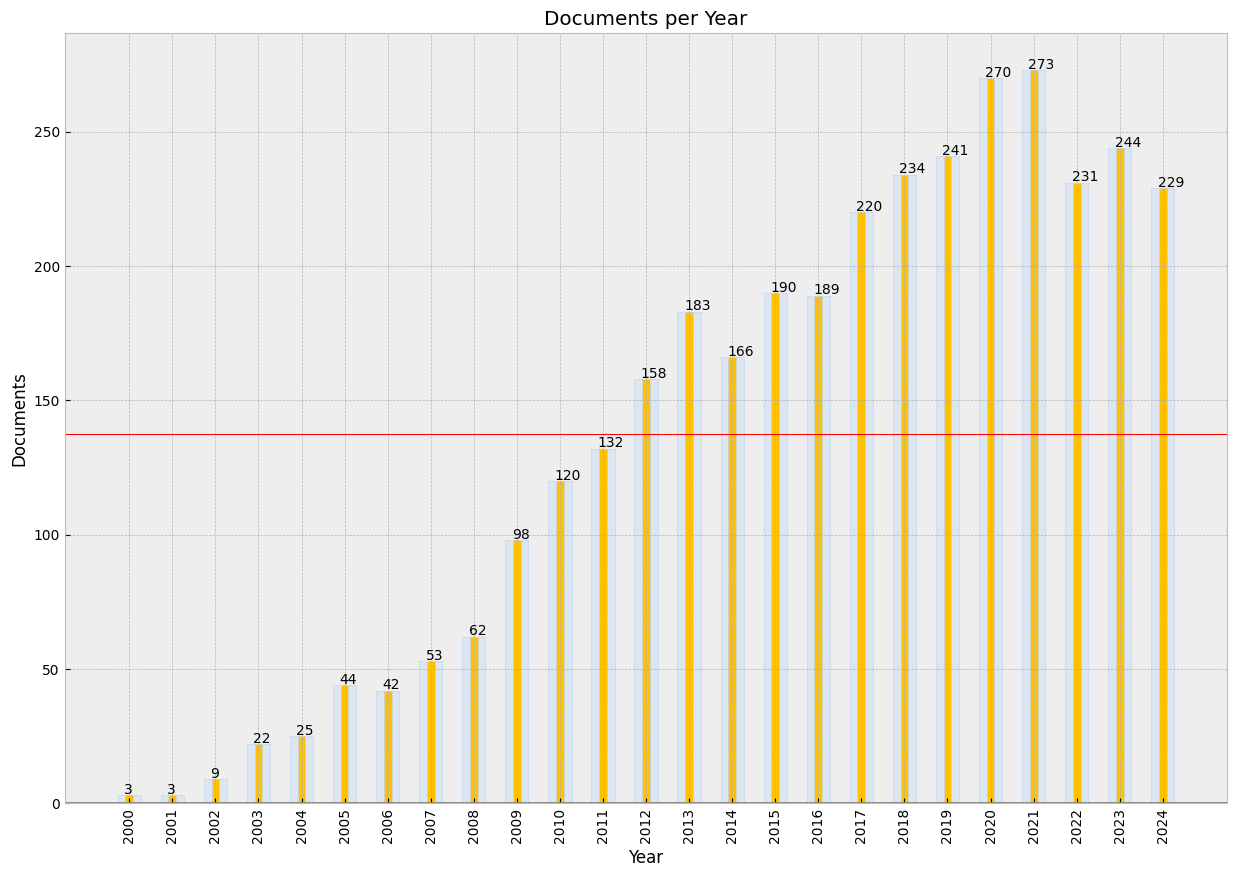

In [12]:
# Bar Plots
# Arguments: statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#            topn      = Total number entities
bibfile.plot_bars(statistic = 'dpy', topn = 20, size_x = 15, size_y = 10)

In [13]:
# View Table
data_bp = bibfile.ask_gpt_bp.head(15)
data_bp


Year  Documents
0   2000          3
1   2001          3
2   2002          9
3   2003         22
4   2004         25
5   2005         44
6   2006         42
7   2007         53
8   2008         62
9   2009         98
10  2010        120
11  2011        132
12  2012        158
13  2013        183
14  2014        166

这段代码描述了一个函数或方法，用于生成一个交互式的网络图，展示文档（蓝色节点）和引用（红色节点）之间的引用关系

In [3]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

KeyboardInterrupt: 

函数描述：

这个函数生成一个基于地图的交互式网络图，展示国家之间的合作网络。
参数：

view：指定图表的显示方式，可以在笔记本应用或浏览器窗口中查看。
connections：布尔值，指示是否显示国家之间的连接线。如果设置为True，则显示国家之间的连接线；如果设置为False，则不显示。
country_lst：一个列表，用于指定需要高亮显示的国家之间的连接。如果列表为空（[]），则不特别高亮任何国家的连接。
功能：

该函数根据提供的参数，计算国家之间的合作网络，并生成一个基于地图的网络图。
网络图中的每个节点代表一个国家，节点之间的边代表合作关系。
通过设置connections，可以控制是否显示国家之间的连接线，以便更好地理解和分析数据。
通过设置country_lst，可以高亮显示特定国家之间的连接，以便特别关注这些国家的合作关系。
输出：

函数生成一个基于地图的交互式网络图，用户可以在笔记本或浏览器中查看。
图表展示了国家之间的合作网络，帮助用户识别关键国家和研究领域内的主要合作模式。

In [4]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

这段代码用于生成一个基于地图的交互式网络图，专门用于分析国家之间的合作研究关系。在这个特定的代码示例中，网络图将只在笔记本应用中显示，并且不会显示国家之间的连接线，但会高亮显示与中国（"China"）相关的连接。以下是代码参数的具体作用：

view：

参数view设置为'notebook'，意味着生成的网络图将在用户偏好的笔记本应用中显示，而不是在浏览器窗口中。
connections：

参数connections设置为False，表示在生成的地图上不会显示国家之间的连接线。这可能是因为想要更清晰地展示国家本身，或者专注于特定的高亮显示，而不是连接关系。
country_lst：

参数country_lst设置为['China']，表示网络图将特别高亮显示与中国相关的连接。如果地图上包含了与中国有合作研究的国家，这些连接将会被突出显示，以便用户可以快速识别中国在全球研究合作网络中的位置和重要性。

In [6]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = False, country_lst = ['China'])

In [7]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

No sentence-transformers model found with name sentence-transformers/all-MiniLM-L6-v2. Creating a new one with mean pooling.


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like sentence-transformers/all-MiniLM-L6-v2 is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [8]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                               'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                               'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                               'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

No sentence-transformers model found with name sentence-transformers/all-MiniLM-L6-v2. Creating a new one with mean pooling.


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like sentence-transformers/all-MiniLM-L6-v2 is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.